# [ ADP 28회 ML ]

## 분류 - 과적합, 오버샘플링(SMOTE), 랜포, 인공신경망, LGBM, 보팅

## 데이터 설명 : 학생 결석일수
- 데이터 출처 : https://www.kaggle.com/datasets/dipam7/student-grade-prediction?resource=download 후처리
- 데이터 링크 : https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p1.csv
- 데이터 설명 : 학생의 다양한 주변 환경에 따른 결석 등급 (absences)
    - sex : 성별 (F : 여성 / M :남성)
    - age : 나이
    - pstatus : 부모와 동거 유무 (T : 동거중 , A : 별거)
    - medu : 어머니 교육(0 - 없음, 1 - 초등 교육(4학년), 2 - 5~9학년, 3 - 중등 교육 또는 4 - 고등 교육)
    - fedu : 아버지 교육(0 - 없음, 1 - 초등 교육(4학년), 2 - 5 - 9학년, 3 - 중등 교육 또는 4 - 고등 교육)
    - guardian : 학생의 보호자
    - traveltime : 집에서 학교까지 이동 시간(1 - <15분, 2 - 15 - 30분, 3 - 30분 - 1시간, 또는 4 - >1시간)
    - studytime : 주간 학습 시간(1 - <2시간, 2 - 2 - 5시간, 3 - 5 - 10시간 또는 4 - >10시간)
    - failures : 과거 클래스 실패 수(n if 1<=n<3, 그렇지 않으면 4)
    - freetime : 방과 후 자유 시간(숫자: 1 - 매우 낮음에서 5 - 매우 높음)
    - famrel : 가족 관계의 질(숫자: 1 - 매우 나쁨에서 5 - 훌륭함)
    - absences : 학교 결석 횟수등급 (0~5, 높은 숫자일수록 많은 결석 횟수)

## 문제
- 1-1) 데이터 EDA & 차원축소가 필요한지?
- 1-2) 1-1에서 찾은 문제 파악후 처리하기
    - 데이터 품질 개선을 위한 방법이 있는지 찾고 데이터셋을 재생성하라
- 1-3) 과적합 문제가 있다고 가정하고 해결하는 방법 2가지 이상 제시/실행/결과
    - 1.2에서 제시한 방법이 데이터 과적합이 된다는 가정하에 어떻게 해결할 수 있을지 2가지 개선안 제시, 각방법들의 장단점 기술 
    
</br>

- 2-1) 랜덤포레스트, 인공신경망(neuralnetwork), LightGBM 모델링 수행 후 f1-score 비교
    - 데이터셋을 기준으로 random forest, neural network , lightgbm 3가지 방식으로 학교 결석 횟수등급을 예측하는 모델을 만들어라, f1 score로 모델을 평가하라
- 2-2) Soft-voting, Hard-voting 수행 후 f1-score 비교
- 2-3) 5가지 방법 중 최적의 방법 선택 및 이유 설명
- 2-4) 만든 모델을 학교 정보시스템에서 활용하려면 어떻게 해야하는지 적고 설명

In [3]:
# 라이브러리 세팅

%config Completer.use_jedi = False # 자동완성 기능

import pandas as pd
pd.set_option('display.max_columns', 200)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

# from IPython.display import display, HTML
# display(HTML("<style>.container {width :95% !important;}</style>"))

# 한글 그래프
import matplotlib.pyplot as plt
import platform
if platform.system() == 'Darwin': #맥
        plt.rc('font', family='AppleGothic') 
elif platform.system() == 'Windows': #윈도우
        plt.rc('font', family='Malgun Gothic') 
elif platform.system() == 'Linux': #리눅스 (구글 콜랩)
        #!wget "https://www.wfonts.com/download/data/2016/06/13/malgun-gothic/malgun.ttf"
        #!mv malgun.ttf /usr/share/fonts/truetype/
        #import matplotlib.font_manager as fm 
        #fm._rebuild() 
        plt.rc('font', family='Malgun Gothic') 
plt.rcParams['axes.unicode_minus'] = False #한글 폰트 사용시 마이너스 폰트 깨짐 해결


# # 한글 안될 때 글꼴 찾는 법
# from matplotlob improt font_manager
# font_manager.get_font_names("goth") # 해당 코딕체 위 코드에 family에 넣어주기

# #  plt.rc('font', family='Malgun Gothic')  << 이 코드 !



# 데이터 분리
from sklearn.model_selection import train_test_split

# 라벨인코딩
from sklearn.preprocessing import LabelEncoder
    
# SMOTE
from imblearn.over_sampling import SMOTE

# 랜포 
from sklearn.ensemble import RandomForestClassifier 

# 인공신경망
from sklearn.neural_network import MLPClassifier

# lgbm 
from lightgbm import LGBMClassifier  

# 보팅
from sklearn.ensemble import VotingClassifier

# 모델 평가 (from ~ import 까지 복붙)
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

import time

## 1-1) 데이터 EDA & 차원축소가 필요한지?

In [4]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/Datamanim/datarepo/main/adp/28/p1.csv")
df.head()

,sex,age,pstatus,medu,fedu,guardian,traveltime,studytime,failures,freetime,famrel,absences
0,F,18,A,4,4,mother,2,2,0,3,4,2
1,F,17,T,1,1,father,1,2,0,3,5,1
2,F,15,T,1,1,mother,1,2,3,3,4,3
3,F,15,T,4,2,mother,1,3,0,2,3,0
4,F,16,T,3,3,father,1,2,0,3,4,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   pstatus     395 non-null    object
 3   medu        395 non-null    int64 
 4   fedu        395 non-null    int64 
 5   guardian    395 non-null    object
 6   traveltime  395 non-null    int64 
 7   studytime   395 non-null    int64 
 8   failures    395 non-null    int64 
 9   freetime    395 non-null    int64 
 10  famrel      395 non-null    int64 
 11  absences    395 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 37.2+ KB


#### 칼럼의 특성을 살펴봤을 때 sex(성별), Pstatus(부모님 동거여부), guardian(주보호자)가 범주형 변수임을 확인할 수 있다.
#### 모델링을 위해 추후 인코딩을 고려해볼 수 있다.

In [6]:
df.describe()

,age,medu,fedu,traveltime,studytime,failures,freetime,famrel,absences
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.235443,3.944304,1.377215
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.998862,0.896659,1.555076
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,3.000000,4.000000,0.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,3.000000,4.000000,1.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,4.000000,5.000000,3.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,4.000000


#### Age 변수의 경우, 기초통계량 결과를 봤을 때 큰 이상이 없어보인다. '학생'의 데이터임을 감안했을 때에도 특별한 이상이 없다고 판단했다.
#### 다른 변수들의 경우에도 describe 결과를 봤을 때, 보통 0~5값을 가지는 형태를 보아 겉보기에 이상치로 판단되는 것이 없다고  생각했다.

In [7]:
df.isnull().sum() # 실제 28회 후기에는 결측치가 존재하지 않았다고 함

sex           0
age           0
pstatus       0
medu          0
fedu          0
guardian      0
traveltime    0
studytime     0
failures      0
freetime      0
famrel        0
absences      0
dtype: int64

In [8]:
df["absences"].value_counts()

0    183
4     66
1     61
3     49
2     36
Name: absences, dtype: int64

- 종속변수가 불균형함을 알 수 있다.

- 아래는 시험 데이터에 맞게 변형 및 전처리하려던 코드임 (걍 참고)

In [9]:
# # 시험 상황에 비슷하게 값 변형 (임의)
# # 실제 28회 후기에는 target 값이 0~4 (5개)

# # 랜덤 시드 설정
# np.random.seed(42)

# # 변경할 숫자 범위 지정
# new_values = list(range(5))

# # 0~4가 아닌 다른 숫자들에 대해 임의적으로 매핑
# other_values = df.loc[~df["absences"].isin(new_values), "absences"].unique()
# mapping_dict = {value: np.random.choice(new_values) for value in other_values}

# # absences 열에 매핑 적용하여 값 변경
# df["absences"] = df["absences"].replace(mapping_dict)

# print(df["absences"].value_counts())

### 수치형 변수 분포 시각화

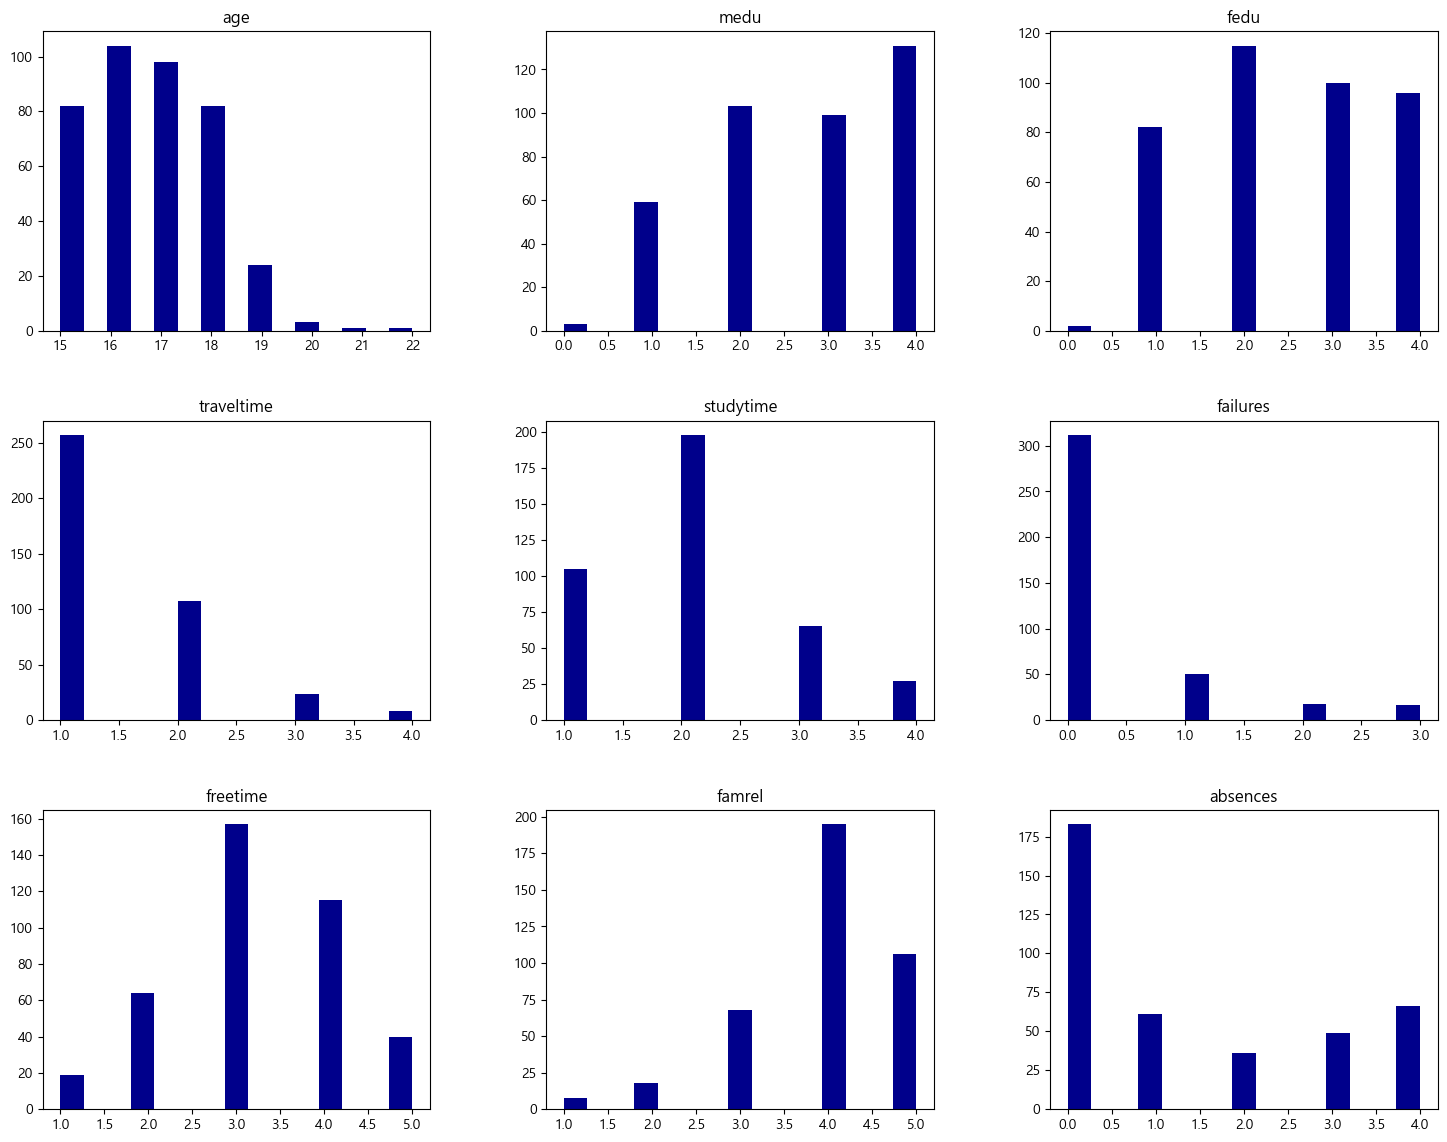

In [10]:
df.hist(bins=15, color='darkblue', figsize=(18,14), grid=False)
plt.show()

#### 원래 시험에서는 종속변수인 absences에 클래스 불균형이 있었다고 함. 추후 오버샘플링 방법 고려 

### 이상치 탐색

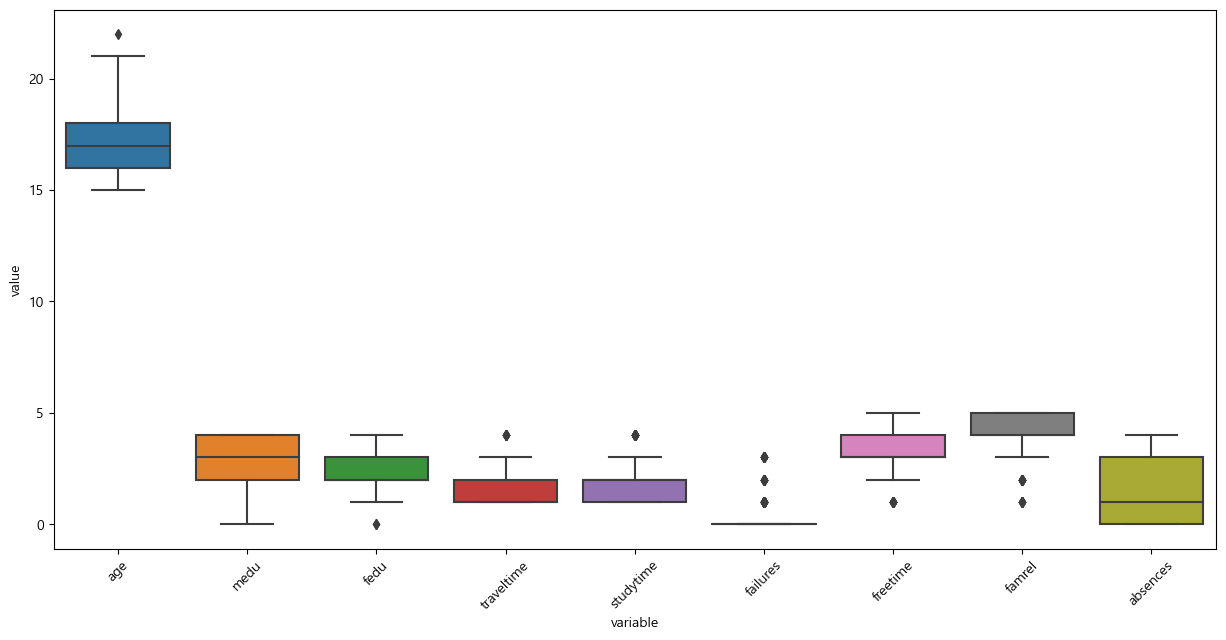

In [11]:
# 두 줄로 쉽게 끝내는 방법
# df.boxplot(figsize=(18,10))
# plt.show()


# boxplot을 그리기 위해 범주형 변수 제거 후 수치형 변수 columns 활용 
continuous_vars = df.select_dtypes(include=['int64', 'float64']).columns

X = df[continuous_vars]
df_v1 = pd.melt(X ,var_name='variable', value_name='value')

plt.figure(figsize = (15, 7))
sns.boxplot(x='variable', y='value', data=df_v1)
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.show()

### 범주형 변수 시각화

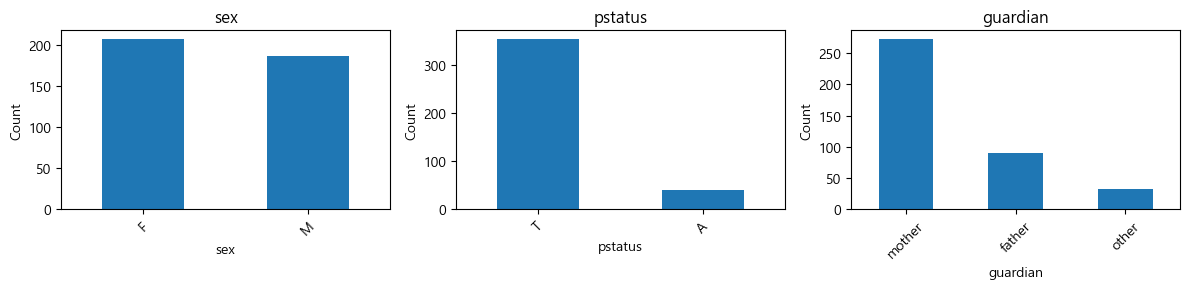

In [12]:
# 데이터 프레임에서 범주형 변수 선택
categorical_vars = df.select_dtypes(include=['object']).columns

# 범주형 변수에 대한 barplot 그리기
fig, axes = plt.subplots(1, len(categorical_vars), figsize=(12, 3))

for i, var in enumerate(categorical_vars):
    ax = axes[i]
    df[var].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(var)
    ax.set_xlabel(var)
    ax.set_ylabel('Count')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # 라벨들의 각도 조절

plt.tight_layout()
plt.show()

### 상관관계 시각화

<AxesSubplot:>

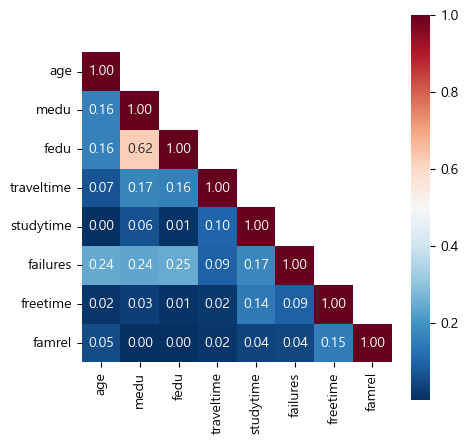

In [13]:
# 상관관계 시각화 : 히트맵
plt.figure(figsize=(5, 5))

# corr matrix 생성
corr_matrix = df.drop(['absences'], axis=1).corr().abs() # .abs() 절댓값 기준

# 상삼각행렬 반환
up_mask = np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool_)

sns.heatmap(corr_matrix, mask=up_mask, annot=True, 
            fmt='.2f', square=True, cmap='RdBu_r')

- 히트맵 시각화 결과, 변수 간 상관관계가 다소 높아보이는 경우가 존재하지 않는다고 파악하였다.
- 변수 간 상관관계가 높다면 다중공선성이 발생해 예측 성능에 문제를 일으킬 수 있으므로, 추후 차원축소나 변수 선택법 등의 방법을 고려해야한다. 
- 하지만 본 데이터에서는 다중공선성의 문제가 우려되지 않는다고 생각하였다.
- 또한 변수들이 명확한 의미를 가지고 있고 모델의 해석이 중요한 경우라고 생각하여, 차원축소 시 변수들의 해석 가능성이 저하될 다른 문제가 발생할 수 있어 차원축소에는 신중한 판단이 필요하다.

## 1-2) 1-1에서 찾은 문제 파악후 처리하기
## (데이터 품질 개선을 위한 방법이 있는지 찾고 데이터셋을 재생성하라)

In [14]:
# ### 결측치 처리
# - 위에서 결측치 확인 결과, age, traveltime, freetime 변수에 각각 3, 3, 5개의 결측치가 있었으므로 결측치를 처리해준다.
# - 결측값을 평균으로 대체 시 이상치의 영향을 받아 데이터가 왜곡될 수 있으므로 median으로 대체하는 방법을 고려한다.

# # 결측치를 중앙값으로 대체
# df['age'] = df['age'].fillna(df['age'].median()) 
# df['traveltime'] = df['traveltime'].fillna(df['traveltime'].median()) 
# df['freetime'] = df['freetime'].fillna(df['freetime'].median()) 

# print(df.isnull().sum())

### 범주형 변수 인코딩 : get_dummies()
- 변수들은 모델에 직접적으로 입력될 수 없으므로, 숫자 형태로 변환해주기 위해 인코딩 해준다.

In [15]:
# 더미코딩
df = pd.get_dummies(df, drop_first=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   age              395 non-null    int64
 1   medu             395 non-null    int64
 2   fedu             395 non-null    int64
 3   traveltime       395 non-null    int64
 4   studytime        395 non-null    int64
 5   failures         395 non-null    int64
 6   freetime         395 non-null    int64
 7   famrel           395 non-null    int64
 8   absences         395 non-null    int64
 9   sex_M            395 non-null    uint8
 10  pstatus_T        395 non-null    uint8
 11  guardian_mother  395 non-null    uint8
 12  guardian_other   395 non-null    uint8
dtypes: int64(9), uint8(4)
memory usage: 29.4 KB


In [16]:
# 피쳐와 종속변수 할당
X = df.drop(['absences'], axis=1)
y = df['absences']
display(X.head(3))

,age,medu,fedu,traveltime,studytime,failures,freetime,famrel,sex_M,pstatus_T,guardian_mother,guardian_other
0,18,4,4,2,2,0,3,4,0,0,1,0
1,17,1,1,1,2,0,3,5,0,1,0,0
2,15,1,1,1,2,3,3,4,0,1,1,0


### 연속형 변수 스케일링

In [17]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_scaled = scaler.fit_transform(X)
df_scaled = pd.DataFrame(df_scaled, columns=X.columns)
df_scaled

,age,medu,fedu,traveltime,studytime,failures,freetime,famrel,sex_M,pstatus_T,guardian_mother,guardian_other
0,1.023046,1.143856,1.360371,0.792251,-0.042286,-0.449944,-0.236010,0.062194,-0.948176,-2.938392,0.668496,-0.296908
1,0.238380,-1.600009,-1.399970,-0.643249,-0.042286,-0.449944,-0.236010,1.178860,-0.948176,0.340322,-1.495896,-0.296908
2,-1.330954,-1.600009,-1.399970,-0.643249,-0.042286,3.589323,-0.236010,0.062194,-0.948176,0.340322,0.668496,-0.296908
3,-1.330954,1.143856,-0.479857,-0.643249,1.150779,-0.449944,-1.238419,-1.054472,-0.948176,0.340322,0.668496,-0.296908
4,-0.546287,0.229234,0.440257,-0.643249,-0.042286,-0.449944,-0.236010,0.062194,-0.948176,0.340322,-1.495896,-0.296908
...,...,...,...,...,...,...,...,...,...,...,...,...
390,2.592380,-0.685387,-0.479857,-0.643249,-0.042286,2.242901,1.768808,1.178860,1.054656,-2.938392,-1.495896,3.368048
391,0.238380,0.229234,-1.399970,0.792251,-1.235351,-0.449944,0.766399,-2.171138,1.054656,0.340322,0.668496,-0.296908
392,3.377047,-1.600009,-1.399970,-0.643249,-1.235351,3.589323,1.768808,1.178860,1.054656,0.340322,-1.495896,3.368048
393,1.023046,0.229234,-0.479857,2.227751,-1.235351,-0.449944,0.766399,0.062194,1.054656,0.340322,0.668496,-0.296908


## 1-3) 과적합 문제가 있다고 가정하고 해결하는 방법 2가지 이상 제시/실행/결과
##  1.2에서 제시한 방법이 데이터 과적합이 된다는 가정하에 어떻게 해결할 수 있을지 2가지 개선안 제시, 각 방법들의 장단점 기술

### 1. 데이터 증량 (추가 데이터 확보 및 다양성 증대)
 - 장점 : 더 많고 다양한 데이터를 수집하고 추가함으로써 모델의 일반화 성능을 향상시킬 수 있다.
 - 단점 : 추가 데이터 수집이 어려울 수 있으며, 데이터 관찰 수가 증가하여 늘어나더라도 과적합이 완전히 해결되지 않을 수 있다.

### 2. 오버샘플링 - SMOTE
- 오버샘플링하여 적절한 학습 데이터를 확보하는게 중요. 따라서 SMOTE 후에 train, test 분리해주는 것임
- 종속변수 클래스 불균형 문제가 존재할 시, 분류 모델 성능 중 Accuracy에 초점을 두게 된다면 과적합의 위험이 존재할 수 있다. (실제 시험에서 어떤 범주는 value counts가 3밖에 안되는 심한 imbalances 데이터였다고 함)
- 따라서 이를 해결하기 위해, 언더샘플링 혹은 오버 샘플링 방법으로 데이터 분포를 맞춰줘야한다. 
    - 하지만 언더샘플링의 경우 데이터가 적은 갯수에 맞춰 샘플링이 된다면 데이터 손실이 크기 때문에 오버샘플링 방법이 필요하다고 판단했다. 그 중 과적합을 방지하는 'SMOTE' 방법을 고려하는것이 적절할 것으로 보인다.
    
(오버샘플링 2가지 방법- 랜덤오버샘플링, SMOTE 시각화로 비교해도 괜찮을 것 같음. 27회, 23회, 22회 참고)

In [18]:
print('Original Data')
print(y.value_counts()) 

Original Data
0    183
4     66
1     61
3     49
2     36
Name: absences, dtype: int64


In [19]:
from imblearn.over_sampling import SMOTE

# SMOTE
X_SMO, y_SMO = SMOTE(random_state=2023).fit_resample(df_scaled, y)

print('After SMOTE')
print(y_SMO.value_counts())

After SMOTE
2    183
1    183
3    183
0    183
4    183
Name: absences, dtype: int64


In [20]:
# 데이터 분할
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_SMO, 
                                                    y_SMO,                                                     
                                                    random_state=2023,
                                                    test_size=0.2)

In [21]:
X_train.shape, X_test.shape

((732, 12), (183, 12))

## 2-1) 랜덤포레스트, 인공신경망(neuralnetwork), LightGBM 모델링 수행 후 f1-score 비교

### 클래스가 3개 이상인 다중분류(Multi-class)인 경우 : macro f1

```python
# f1_score의 average 옵션 이용
sklearn.metrics.f1_score(y_true, y_pred, average="macro") 
```

- f1-score은 0과 1 사이의 값을 가지며, 높을수록 분류 모델의 성능이 좋다고 판단
- f1-score이 1에 가까울수록 모델이 정확하게 클래스를 분류하고 있으며, 정밀도와 재현율이 모두 높은 수준으로 유지되고 있는 것을 의미

</br>

- Macro Average F1 Score : 클래스별 F1 Score를 평균
    -  Macro F1 점수는 모든 클래스에 대한 성능을 고려하기 때문에, 클래스 불균형이 심한 경우에도 공평한 평가를 제공
    
    
- Micro Average F1 Score : 클래스별 accuracy = micro-recall
    - 클래스별로 분리된 접근이 아니라 전체 데이터셋 수준에서 계산
    - 클래스 간 불균형이 심한 경우 micro방식은 작은 클래스의 성능이 무시될 수 있고, 큰 클래스가 평균에 미치는 영향이 더 크게 나타날 수 있음
    
    
- Weighted Average F1 Score : 클래스별 F1 Score * Support 비율
    - weighted방식은 작은 클래스의 성능이 무시될 수 있다.

In [22]:
# # 추가 공부 : 그리드 서치
# 위에서 교차검증 진행했으니, 시험장에선 시간 효율따져서 굳이 실행 X ..

# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [100, 150, 200, 250],
#     'max_depth': [None, 6, 9, 12],
#     'min_samples_split': [0.01, 0.05, 0.1],
#     'max_features': ['auto', 'sqrt'],
# }

### 1) 랜덤포레스트

In [23]:
start = time.time()

rf = RandomForestClassifier()
rf.fit(X_train, y_train)

end = time.time()

rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)

print("모델 수행시간 : {:.3f}초".format(end-start))


print("RF model f1-score:",
      np.round(f1_score(y_test, rf.predict(X_test), average='macro'), 3))


print('train -----------------------------')
print('accuracy_score:', accuracy_score(y_train, rf_train))
# print(confusion_matrix(y_train, rf_train))
print(classification_report(y_train, rf_train))

print('\n\ntest ------------------------------')
print('accuracy_score:', accuracy_score(y_test, rf_test))
# print(confusion_matrix(y_test, rf_test))
print(classification_report(y_test, rf_test))

모델 수행시간 : 0.291초
RF model f1-score: 0.72
train -----------------------------
accuracy_score: 0.9986338797814208
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       149
           1       1.00      1.00      1.00       144
           2       0.99      1.00      1.00       148
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00       150

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



test ------------------------------
accuracy_score: 0.7213114754098361
              precision    recall  f1-score   support

           0       0.51      0.56      0.54        34
           1       0.70      0.72      0.71        39
           2       0.79      0.86      0.82        35
           3       0.89      0.74      0.81        42
           4       0.73      0.73      0.73        33



In [24]:
# # 추가 : Grid Search 수행
# rf_grid = GridSearchCV(estimator=rf, 
#                            param_grid=param_grid, 
#                            cv=5, 
#                            n_jobs=-1, 
#                            verbose=2,
#                            scoring=scoring
#                           )
# rf_grid.fit(X_SMO, y_SMO)
# print("best param:\n", rf_grid.best_params_)



# # rf_grid.best_estimator_
# rf_pred =  rf_grid.best_estimator_.predict(test_X)
# print("RF model f1-score:", np.round( f1_score(test_y, 
#                                                rf_pred,
#                                                average='macro'),3))

### 2) 인공신경망

In [25]:
# mlp_params= {
#    'hidden_layer_sizes': [100, 150, 200],
#    'solver': ['lbfgs', 'sgd', 'adam'],
#   #  'momentum': np.arange(0.1,1.1,0.1),
#   #  'learning_rate': [0.001, 0.01]
#         }

In [26]:
start = time.time()

mlp = MLPClassifier()
mlp.fit(X_train, y_train)

end = time.time()

mlp_train = mlp.predict(X_train)
mlp_test = mlp.predict(X_test)

print("모델 수행시간 : {:.3f}초".format(end-start))

print("MLP model f1-score:", 
      np.round(f1_score(y_test, mlp.predict(X_test), average='macro'), 3))

print('train -----------------------------')
print('accuracy_score:', accuracy_score(y_train, mlp_train))
# print(confusion_matrix(y_train, mlp_train))
print(classification_report(y_train, mlp_train))

print('\n\ntest ------------------------------')
print('accuracy_score:', accuracy_score(y_test, mlp_test))
# print(confusion_matrix(y_test, mlp_test))
print(classification_report(y_test, mlp_test))

모델 수행시간 : 1.664초
MLP model f1-score: 0.582
train -----------------------------
accuracy_score: 0.8224043715846995
              precision    recall  f1-score   support

           0       0.77      0.64      0.70       149
           1       0.81      0.76      0.79       144
           2       0.83      0.93      0.87       148
           3       0.85      0.91      0.88       141
           4       0.85      0.87      0.86       150

    accuracy                           0.82       732
   macro avg       0.82      0.82      0.82       732
weighted avg       0.82      0.82      0.82       732



test ------------------------------
accuracy_score: 0.5956284153005464
              precision    recall  f1-score   support

           0       0.44      0.35      0.39        34
           1       0.52      0.44      0.47        39
           2       0.59      0.69      0.63        35
           3       0.71      0.81      0.76        42
           4       0.65      0.67      0.66        33

In [27]:
# # Grid Search 수행
# mlp_grid = GridSearchCV(estimator=mlp, 
#                            param_grid=mlp_params, 
#                            cv=5, 
#                            n_jobs=-1, 
#                            verbose=2,
#                            scoring=scoring
#                           )
# mlp_grid.fit(train_X_over, train_y_over)
# print("best param:\n", mlp_grid.best_params_)


# # mlp.best_estimator_
# print("MLP model f1-score:", np.round( f1_score(test_y, 
#                                                mlp_grid.best_estimator_.predict(test_X),
#                                                 average='macro'),3))

### 3) LGBM

In [28]:
start = time.time()

lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)

end = time.time()

lgbm_train = lgbm.predict(X_train)
lgbm_test = lgbm.predict(X_test)

print("모델 수행시간 : {:.3f}초".format(end-start))

print("lgbm model f1-score:", 
      np.round(f1_score(y_test, lgbm.predict(X_test), average='macro'), 3))

print('train -----------------------------')
print('accuracy_score:', accuracy_score(y_train, lgbm_train))
# print(confusion_matrix(y_train, lgbm_train))
print(classification_report(y_train, lgbm_train))

print('\n\ntest ------------------------------')
print('accuracy_score:', accuracy_score(y_test, lgbm_test))
# print(confusion_matrix(y_test, lgbm_test))
print(classification_report(y_test, lgbm_test))

모델 수행시간 : 0.904초
lgbm model f1-score: 0.718
train -----------------------------
accuracy_score: 0.9986338797814208
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       149
           1       1.00      1.00      1.00       144
           2       1.00      0.99      1.00       148
           3       1.00      1.00      1.00       141
           4       1.00      1.00      1.00       150

    accuracy                           1.00       732
   macro avg       1.00      1.00      1.00       732
weighted avg       1.00      1.00      1.00       732



test ------------------------------
accuracy_score: 0.7103825136612022
              precision    recall  f1-score   support

           0       0.47      0.68      0.55        34
           1       0.70      0.67      0.68        39
           2       0.90      0.80      0.85        35
           3       0.83      0.69      0.75        42
           4       0.77      0.73      0.75        3

#### 랜덤포레스트가 세 모델 중 0.724로 가장 f1 score가 높음을 확인할 수 있다.

- 근데 전체적으로 과적합 된거같은데;

### 추가 공부 : catboost 
- Boosting 계열의 앙상블 알고리즘
- **범주형 변수(Categorical Variable)가 많을 때 사용** (회귀, 분류 모두 가능)
</br>

-  알고리즘 이해  
    - 기존의 부스팅 모델이 일괄적으로 모든 훈련 데이터를 대상으로 잔차계산을 했다면, CatBoost는 일부의 데이터만 가지고 
         잔차계산을 한 뒤, 이 데이터로 모델을 만들고 그 다음의 데이터의 잔차는 이 모델로 예측한 값을 사용한다.  
    - CatBoost는 시계열이 포함되어 있지 않은 일반적인 비시계열 데이터라도 CatBoost가 임의적으로 시계열을 형성해 Boosting 진행  
    - 아래는 10개의 데이터 밖에 없지만, 10만개의 경우 10만개의 모델을 학습 시키기에 연산속도가 느려질 것이다. 그래서 CatBoost는 이전 설명처럼 일부 데이터만 가지고 학습해, 속도를 개선 시킨 것 ( 그래서 log(데이터갯수) 만큼 데이터 추출 )
    
</br>

- 장점
    - Xgboost, LightGBM 의 다른 Boosting 계열 알고리즘 보다 학습 속도가 개선되었다.
    - 기존의 Boosting 계열의 알고리즘보다 오버피팅을 개선 시켰다.
    - 데이터 셋을 명확하게 구분할 수 있는 중복되는 변수가 2개 이상 존재할 때, 이를 하나의 변수로 통합해 처리해서 Feature가 줄어
    들어 학습 속도 개선됨 (아래 2개 feature는 똑같아서 둘 다 필요 없음)
    
</br>

- 단점
     - 데이터 대부분이 수치형 변수인 경우, Light GBM 보다 학습 속도가 느리다. (범주형 변수가 많을 때 사용 하라는 뜻)
     - 결측치가 매우 많은 데이터에는 부적합하다.

Catboost 옵션 상세 내용

- cat_features=cat_features 옵션
    - 현재 이 데이터는 범주형 변수이긴 하나 모두 수치형으로 되어 있어서 cat_feature라는 파라미터를 사용하지 않아도 되지만
    - 만약 범주형 변수가 있으면 해당 컬럼 이름 또는 컬럼의 인덱스를 리스트 형태로 적어주면 된다.
- loss_function='MultiClass
    -  손실함수로써 해당 손실함수가 계속 작아지도록 학습하는 것임
    - target의 범주가 3개 이상일 때 : MultiClass
    - 2개 이하 일때 : 'Logloss' 써주면 됨 
- eval_metric='AUC'
    - 평가척도로 AUC 사용: 원래 다중클래스에서는 AUC보다 F1-Score Macro가 좀 더 적절 
    - (중요) 만일 target의 class 불균형이 심하다면 무조건 F1-Score 를 사용하고 class 갯수가 3개 이상이라면 F1-Score Macro를 사용
    - 그런데 우선 Catboost에서 F1-Score Macro가 없고 현재 데이터는 target의 불균형이 심하질 않다.

In [29]:
from catboost import CatBoostClassifier # 오래걸림

# Catboost 모델
start = time.time()
clf_catb = CatBoostClassifier(# cat_features=cat_features
                             n_estimators = 100,          # tree 생성 갯수
                             max_depth = 10,              # tree 깊이
                             learning_rate = 0.01,        # 학습률
                             loss_function='MultiClass',  
                             eval_metric='AUC',                                                                  
                             random_state=2023,
                             verbose=False)
clf_catb.fit(X_train, y_train)

print("Catboost model f1-score:", 
      np.round( f1_score(y_test, clf_catb.predict(X_test),average='macro'),3))

end = time.time()
print("모델 수행시간 : {:.3f}초".format(end-start))

Catboost model f1-score: 0.69
모델 수행시간 : 11.871초


## 2-2) Soft-voting, Hard-voting 수행 후 f1-score 비교
## hard voting, soft voting에 대한 장단점을 설명하고 2-1의 3가지 모델로 구현하라. 두 방식의 f1-score를 비교하라 

- 앙상블 모델의 예측값을 결정짓기 위해 weak learner의 예측값을 바탕으로 voting
- 보팅은 일반적으로 서로 다르 알고리즘을 가진 분류기를 결합

### hard voting (직접 투표) : 각 모델의 예측값을 바탕으로 다수결 투표
- 각 분류기의 예측을 모아서 가장 많이 선택된 클래스를 예측하는 것

### soft voting (간접 투표) : 각 모델의 예측값들의 평균 또는 가중치 합을 사용하는 방식
- **모든 분류기가 클래스의 확률을 예측**할 수 있으면(즉, predict_proba() 메서드가 있으면), 개별 분류기의 예측을 평균내어 확률이 가장 높은 클래스를 예측
- 분류기들의 레이블 값 결정 확률을 모두 더하고, 이를 평균해서 이들 중 확률이 가장 높은 레이블 값을 최종 보팅 결과값으로 선정
- 일반적으로 하드 보팅보다는 소프트 보팅이 예측 성능이 좋아서 더 많이 사용됨
</br>

- predict_proba() 메서드를 제공하는 분류기 : 확률 기반의 예측을 수행
    - 로지스틱 회귀 (Logistic Regression)
    - 나이브 베이즈 (Naive Bayes)
    - 서포트 벡터 머신 (Support Vector Machines)의 일부 구현
    - K-최근접 이웃 (K-Nearest Neighbors)의 일부 구현
    - 의사결정나무 (Decision Trees)의 앙상블 모델인 랜덤 포레스트 (Random Forest)와 그래디언트 부스팅 (Gradient Boosting) 기반의 모델들 (예: XGBoost, LightGBM, CatBoost)

</br>

- 반면에 predict_proba() 메서드를 제공하지 않는 분류기들은 클래스에 대한 확률 분포를 직접적으로 제공하지 않음
    - 의사결정나무 (Decision Trees)의 단일 트리 구현
    - 서포트 벡터 머신 (Support Vector Machines)의 일부 구현
    - 신경망 (Neural Networks)의 일부 구현


In [30]:
from sklearn.ensemble import VotingClassifier

# 소프트 보팅

start = time.time()
soft_voting = VotingClassifier(voting='soft',
                               estimators=[('rf', rf), ('mlp', mlp), ('lgbm', lgbm)])
soft_voting.fit(X_train, y_train)

end = time.time()
print("soft voting 모델 수행시간 : {:.3f}초".format(end-start))

print("Soft Voting model f1-score:",
      np.round(f1_score(y_test, soft_voting.predict(X_test), average='macro'), 3))

print("======================")


# 하드 보팅
start = time.time()
hard_voting = VotingClassifier(voting='hard',
                               estimators=[('rf', rf),('mlp', mlp),('lgbm', lgbm)])
hard_voting.fit(X_train, y_train)

end = time.time()
print("hard voting 모델 수행시간 : {:.3f}초".format(end-start))

print("Hard Voting model f1-score:",
      np.round(f1_score(y_test, hard_voting.predict(X_test),average='macro'),3))

soft voting 모델 수행시간 : 2.272초
Soft Voting model f1-score: 0.737
hard voting 모델 수행시간 : 2.266초
Hard Voting model f1-score: 0.723


## 2-3) 5가지 방법 중 최적의 방법 선택 및 이유 설명

```
< 모델 성능 >
RF model f1-score: 0.724
MLP model f1-score: 0.553
lgbm model f1-score: 0.718
Soft Voting model f1-score: 0.737
Hard Voting model f1-score: 0.731
```

```
< 모델 수행 시간 >
RF 모델 수행시간 : 0.291초
MLP 모델 수행시간 : 1.664초
lgbm 모델 수행시간 : 0.904초
soft voting 모델 수행시간 : 2.272초
hard voting 모델 수행시간 : 2.266초
```

- 성능 측면에서는 Soft Voting  model이 가장 높은 f1 score를 보였다.
    - 소프트 보팅은 여러 다른 머신 러닝 모델의 예측 결과를 평균화하고, 이러한 다양성을 활용하여 더 좋은 예측을 만든다.
    - RF (Random Forest), MLP (Multi-Layer Perceptron), 그리고 LGBM (Light Gradient Boosting Machine)이 서로 다른 알고리즘이다.
    - 이러한 모델의 다양성은 예측 오차의 상호 보완적인 면을 활용하게 된다.
    

- 하지만 다른 모델들과 비교하여 가장 수행시간이 길었고, 랜덤포레스트와 보팅 간에는 모델 성능이 눈에 띄는 차이를 보이지 않는다.
- 따라서 성능이 높으면서 수행시간이 짧은, 보팅보다는 복잡하지 않은 모델인 랜덤포레스트를 최종 모델로 고려하는 게 적절하다고 판단했다.


## 추가/변형 문제) 총 5개 모델(RF, NN, LGBM, 하드보팅, 소프트보팅) 중 실시간 온라인 시스템에 가장 적합한 모델과 선정이유를 객관적으로 제시하라 (5점)

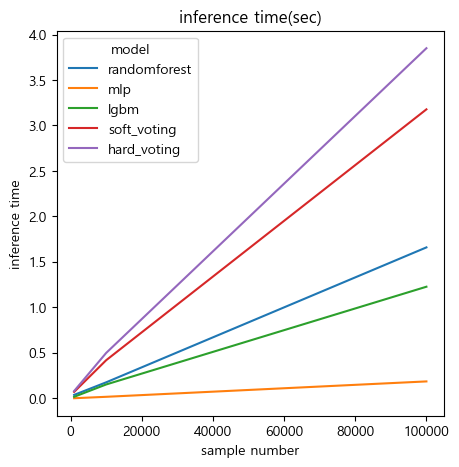

In [34]:
def sample_generate(n):
    sp = X_SMO.sample(n, replace=True)
    return sp

def count_predict_times(model,data):
    
    start = time.time()
    model.predict(data)
    end = time.time()
    
    inference_time = end - start
    return inference_time

lst = []
for model,name in [(rf,'randomforest'),(mlp,'mlp'),(lgbm,'lgbm'),(soft_voting,'soft_voting'),(hard_voting,'hard_voting')]:
    for sample_number in [1000,10000,100000]:
        inference_time = count_predict_times(model,sample_generate(sample_number))
        lst.append([name,sample_number,inference_time])
        
t= pd.DataFrame(lst,columns =['model','sample number','inference time'])
tp = t.pivot_table(index='model',columns ='sample number',values ='inference time')

fig,ax = plt.subplots(1,figsize=(5,5))
sns.lineplot(data =t , x = 'sample number',y= 'inference time',hue='model',ax=ax)
plt.title('inference time(sec)')
plt.show()

(데이터마님 풀이 참고)
- 아래 그래프는 샘플수에 따른 각 모델별 모델추론 시간에 대한 그래프이다.
- 모델 수에 따라 추론시간이 선형적으로 증가하는 것을 확인 할 수 있다. 
- 실시간 온라인 시스템에서 관심을 가지는것이 성능인지 빠른 추론시간인지에 따라 선택 방향이 달라질 것 이다.
- 보팅 방식의 경우 3가지 모델을 모두 추론해야하기 때문에 그 시간이 선형 합으로 증가한다.
- 성능의 경우 랜덤포레스트가 가장 좋았지만 추론시간이 lgbm보다 3배이상 크다.
- 시스템의 핵심 요구사항에 따라 랜덤포레스트와 lgbm중에 선택하는 것이 적절하다.

## 2-4) 만든 모델을 학교 정보시스템에서 활용하려면 어떻게 해야하는지 적고 설명
- 계속 새 데이터 들어오니 가중치 업데이트 해야 한다.
- 유저에게 신속한 예측결과 제공 위해 시간효율성으로 적극적으로 고려해야 한다
- 데이터 쌓이면 과적합 방지 위해서 모델 조금 경량화 해도 괜찮다 등등...

</br>

- 1) 데이터 갱신/ 모델 배치 주기 / 모델 재학습 기간 설정 
    - ex. 금주 학생의 결석 예측 시스템 결과를 보기 위해 모델을 일주일 마다, 매주 일요일에 실행
    - 데이터베이스에 부하가 없는 시간대에 돌 수 있도록 스케쥴링 시간 설정
    - 데이터의 변화나 환경의 변화에 따라 모델을 조정하고 유지 보수하는 것 중요
    - 모델이 활용되는 동안 예측 성능을 모니터링하고, 필요한 경우 모델을 업데이트하여 정확도를 개선할 수 있도록 한다.
- 2) API 생성
    - 모델 결과를 Interface 할 수 있는 API를 개발한다. EX) python Flask, FAST API 등
- 3) 개인정보 마스킹 처리
    - 학생 개인에 대한 정보이기에 이름 등 개인정보를 마스킹 처리하여 모델 생성할 수 있도록 주의한다.